In [32]:
import numpy as np
from skimage import data
import matplotlib as plt
from skimage import morphology
from matplotlib.pyplot import imshow, get_cmap

imshow(morphology.disk(1), cmap=get_cmap('gray'))

image_testdilation = np.array([[0,0,0,0,0], 
                       [0,1,0,0,0], 
                       [0,0,0,0,0], 
                       [0,0,0,1,0], 
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

dilation = morphology.binary_dilation(image=image_testdilation, 
                                      selem=morphology.disk(1))
imshow(dilation, cmap=get_cmap('gray'))

image_testerosion = np.array([[0,0,0,0,0], 
                       [0,0,1,0,0], 
                       [0,1,1,1,0], 
                       [0,0,1,0,0], 
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

erosion = morphology.binary_erosion(image_testerosion, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

# L’ouverture c’est la composition de l’érosion par un gabarit suivie de la dilatation par ce même gabarit.
# La fermerture c’est la composition de la dilatation par un gabarit suivie de l’érosion par ce même gabarit.

SyntaxError: invalid character '’' (U+2019) (400018283.py, line 30)

In [33]:
import numpy as np
from skimage import morphology

def Dilatation(image, selem):
    return morphology.binary_dilation(image, selem)

def Erosion(image, selem):
    return morphology.binary_erosion(image, selem)

def Ouverture(image, selem):
    eroded = Erosion(image, selem)
    opened = Dilatation(eroded, selem)
    return opened

def Fermeture(image, selem):
    dilated = Dilatation(image, selem)
    closed = Erosion(dilated, selem)
    return closed

if __name__ == "__main__":
    image_test = np.array([
        [0, 1, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 1, 0]
    ], dtype=bool)
    selem = morphology.disk(1)
    image_dil = Dilatation(image_test, selem)
    image_ero = Erosion(image_test, selem)
    image_ouv = Ouverture(image_test, selem)
    image_fer = Fermeture(image_test, selem)
    
    print("Image originale:\n", image_test.astype(int))
    print("\nDilatation:\n", image_dil.astype(int))
    print("\nÉrosion:\n", image_ero.astype(int))
    print("\nOuverture:\n", image_ouv.astype(int))
    print("\nFermeture:\n", image_fer.astype(int))

Image originale:
 [[0 1 1 0 0]
 [1 1 1 1 0]
 [1 1 0 1 0]
 [0 1 1 1 0]
 [0 0 1 1 0]]

Dilatation:
 [[1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 1 1 1 1]]

Érosion:
 [[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Ouverture:
 [[0 1 0 0 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Fermeture:
 [[1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [0 0 1 1 1]]


Opération choisie : Erosion
Rayon recommandé pour le disque : 2


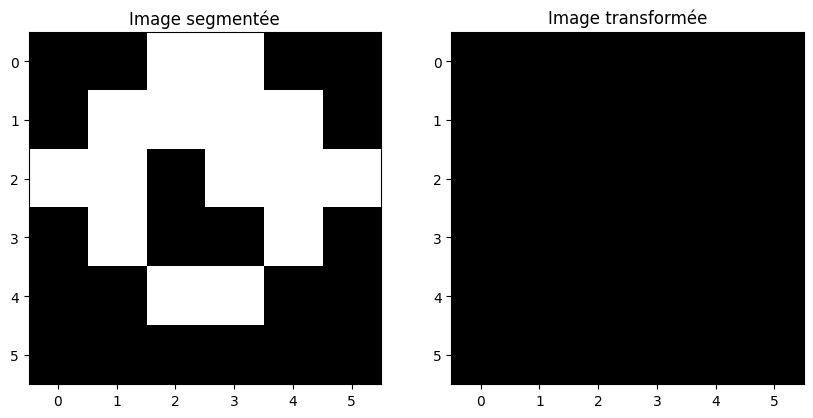

In [34]:
import numpy as np
from skimage import morphology, measure
import matplotlib.pyplot as plt

def choisir_operation_morphologique(image_segmentee):
    regions = measure.regionprops(measure.label(image_segmentee))
    
    if not regions:
        return "Ouverture"
    
    tailles = [region.area for region in regions]
    taille_moyenne = np.mean(tailles)
    discontinuites = np.std(tailles) 

    if taille_moyenne < 10:
        return "Ouverture"

    if discontinuites > 20:
        return "Fermeture"

    if taille_moyenne > 50:
        return "Dilatation"

    return "Erosion"

def choisir_taille_disque(image_segmentee):
    regions = measure.regionprops(measure.label(image_segmentee))
    if not regions:
        return 1  
    
    tailles = [region.area for region in regions]
    taille_moyenne = np.mean(tailles)
    
    rayon = max(1, int(np.sqrt(taille_moyenne / np.pi)))
    return rayon

def appliquer_operation(image_segmentee):
    
    operation = choisir_operation_morphologique(image_segmentee)
    print(f"Opération choisie : {operation}")
    
    rayon = choisir_taille_disque(image_segmentee)
    selem = morphology.disk(rayon)

    if operation == "Dilatation":
        return morphology.binary_dilation(image_segmentee, selem)
    elif operation == "Erosion":
        return morphology.binary_erosion(image_segmentee, selem)
    elif operation == "Ouverture":
        eroded = morphology.binary_erosion(image_segmentee, selem)
        return morphology.binary_dilation(eroded, selem)
    elif operation == "Fermeture":
        dilated = morphology.binary_dilation(image_segmentee, selem)
        return morphology.binary_erosion(dilated, selem)

    return image_segmentee
    


'''
def Dilatation(image, selem):
    return morphology.binary_dilation(image, selem)


def Erosion(image, selem):
    return morphology.binary_erosion(image, selem)


def Ouverture(image, selem):
    eroded = Erosion(image, selem)
    opened = Dilatation(eroded, selem)
    return opened


def Fermeture(image, selem):
    dilated = Dilatation(image, selem)
    closed = Erosion(dilated, selem)
    return closed

'''

if __name__ == "__main__":
    image_segmentee = np.array([
        [0, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype=bool)

    image_transformee = appliquer_operation(image_segmentee)
    rayon_disque = choisir_taille_disque(image_test)
    print(f"Rayon recommandé pour le disque : {rayon_disque}")
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_segmentee, cmap='gray')
    axes[0].set_title("Image segmentée")
    axes[1].imshow(image_transformee, cmap='gray')
    axes[1].set_title("Image transformée")
    plt.show()
    '''
if __name__ == "__main__":
    image_test = np.array([
        [0, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype=bool)

    rayon_disque = choisir_taille_disque(image_test)
    print(f"Rayon recommandé pour le disque : {rayon_disque}")
    selem = morphology.disk(rayon_disque)

    image_dil = Dilatation(image_test, selem)
    image_ero = Erosion(image_test, selem)
    image_ouv = Ouverture(image_test, selem)
    image_fer = Fermeture(image_test, selem)

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    axes[0].imshow(image_test, cmap='gray')
    axes[0].set_title("Image originale")
    
    axes[1].imshow(image_dil, cmap='gray')
    axes[1].set_title("Dilatation")
    
    axes[2].imshow(image_ero, cmap='gray')
    axes[2].set_title("Érosion")
    
    axes[3].imshow(image_ouv, cmap='gray')
    axes[3].set_title("Ouverture")
    
    axes[4].imshow(image_fer, cmap='gray')
    axes[4].set_title("Fermeture")
    
    for ax in axes:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    '''

Opération choisie : Ouverture


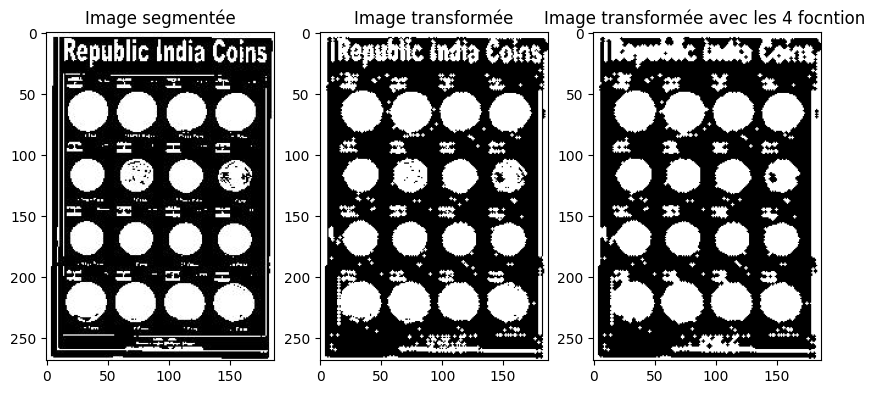

In [46]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def pipeline_morphologique(image_segmentee):
  
    rayon = choisir_taille_disque(image_segmentee)
    selem = morphology.disk(rayon)

    # 1. Ouverture (nettoyage du bruit)
    image_ouverte = Ouverture(image_segmentee, selem)
    
    # 2. Fermeture (combler les trous)
    image_fermee = Fermeture(image_ouverte, selem)
    
    # 3. Érosion (affiner les coins)
    image_erodee = Erosion(image_fermee, selem)
    
    # 4. Dilatation (renforcer les coins)
    image_dilatee = Dilatation(image_erodee, selem)

    return image_dilatee

def charger_image_segmentee(path):
 
    image = Image.open(path).convert('L')  # Convertir en niveaux de gris
    image_array = np.array(image)
    image_segmentee = image_array
    return image_segmentee


if __name__ == "__main__":
    # Remplacez ce chemin par celui de votre image segmentée
    chemin_image = "/Users/chawkibhd/Desktop/coin-counting/segmented_image.jpg"

    # Charger et convertir l'image
    try:
        image_segmentee = charger_image_segmentee(chemin_image)
        imagetraiter = appliquer_operation(image_segmentee)
        i=0
        for i in range (1,2):
         lesfonction= pipeline_morphologique(image_segmentee)
            


        
        fig, axes = plt.subplots(1, 3, figsize=(10, 5))
        axes[0].imshow(image_segmentee, cmap='gray')
        axes[0].set_title("Image segmentée")
        axes[1].imshow(imagetraiter, cmap='gray')
        axes[1].set_title("Image transformée")
        axes[2].imshow(lesfonction, cmap='gray')
        axes[2].set_title("Image transformée avec les 4 focntion ")
        plt.show()
        ''''

        # Affichage pour vérification
        plt.figure(figsize=(6, 6))
        plt.imshow(image_segmentee, cmap='gray')
        plt.title("Image segmentée (binaire)")
        plt.axis('off')
        plt.show()
'''
        #print("Image chargée avec succès en tant que tableau NumPy.")
        #print("Dimensions de l'image :", image_segmentee.shape)
        #print("Exemple de tableau :\n", image_segmentee.astype(int))

    except FileNotFoundError:
        print(f"Erreur : Le fichier '{chemin_image}' est introuvable.")
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

In [36]:
def detect_large_circles(binary_image, min_area=1000, max_area=10000, circularity_threshold=0.8):
    h, w = binary_image.shape
    visited = np.zeros_like(binary_image, dtype=bool)
    circles = []

    def dfs(x, y):
        stack = [(x, y)]
        points = []
        while stack:
            cx, cy = stack.pop()
            if 0 <= cx < h and 0 <= cy < w and not visited[cx, cy] and binary_image[cx, cy] == 255:
                visited[cx, cy] = True
                points.append((cx, cy))
                stack.extend([(cx + 1, cy), (cx - 1, cy), (cx, cy + 1), (cx, cy - 1)])
        return points

    for i in range(h):
        for j in range(w):
            if binary_image[i, j] == 255 and not visited[i, j]:
                points = dfs(i, j)
                if points:
                    area = len(points)
                    if min_area <= area <= max_area:
                        perimeter = 0
                        for x, y in points:
                            if binary_image[max(0, x - 1):min(h, x + 2), max(0, y - 1):min(w, y + 2)].sum() < 255 * 8:
                                perimeter += 1
                        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0
                        if circularity > circularity_threshold:
                            cx = sum(p[0] for p in points) / len(points)
                            cy = sum(p[1] for p in points) / len(points)
                            radius = np.sqrt(area / np.pi)
                            circles.append((cy, cx, radius))

    return circles

imageseg = detect_large_circles(image_segmentee)
imagechoixfonction = detect_large_circles(imagetraiter)
imagelesfonction = detect_large_circles(lesfonction)

print(f"image normal : {len(imageseg)}")
print(f"image avec choix de fonction  : {len(imagechoixfonction)}")
print(f"image les 4 fonction  : {len(imagelesfonction)}")

image normal : 0
image avec choix de fonction  : 0
image les 4 fonction  : 0


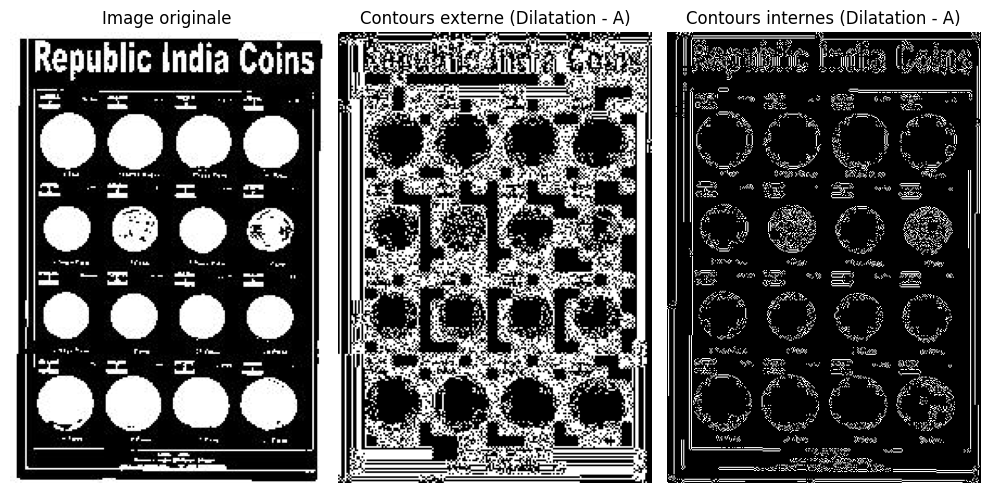

In [37]:
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt
from skimage.morphology import disk

def detection_contour(image, selem):

    image_dilatee = morphology.binary_dilation(image, selem)
    image_erosion = morphology.binary_erosion(image, selem)

    contoursD = image_dilatee & ~image 
    countourE = image & ~image_erosion

    return contoursD, coutoursE



if __name__ == "__main__":
    
    selem = disk(1)

    # Détection des contours internes
    contoursD, contoursE = detection_contour(image_segmentee, selem)


    # Affichage des résultats
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(image_segmentee, cmap='gray')
    axes[0].set_title("Image originale")
    axes[0].axis('off')

    axes[1].imshow(contoursD, cmap='gray')
    axes[1].set_title("Contours externe (Dilatation - A)")
    axes[1].axis('off')
    
    axes[2].imshow(contoursE, cmap='gray')
    axes[2].set_title("Contours internes (Dilatation - A)")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Taille de B1 : 1, Taille de B2 : 1


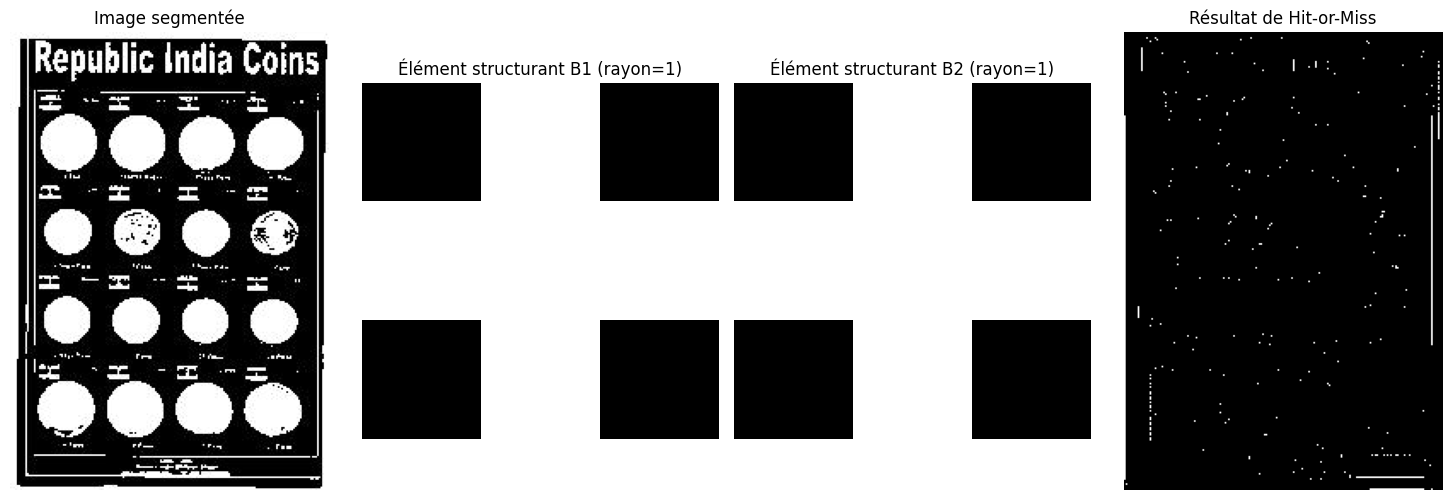

In [45]:
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

def analyser_taille_coins(image):
   
    # Mesurer les propriétés des régions détectées
    regions = measure.regionprops(measure.label(image))
    tailles = [region.area for region in regions]

    if tailles:
        taille_moyenne = int(np.sqrt(np.mean(tailles)))  # Taille moyenne (aire -> rayon)
    else:
        taille_moyenne = 3  # Valeur par défaut

    rayon_B1 = max(1, taille_moyenne // 2)  # \(B_1\) correspond au coin
    rayon_B2 = taille_moyenne  # \(B_2\) englobe \(B_1\)
    return rayon_B1, rayon_B2


def generer_elements_structurants(rayon_B1, rayon_B2):
    
    B1 = morphology.disk(rayon_B1)
    B2 = morphology.disk(rayon_B2)
    return B1, B2

def hit_or_miss(image, B1, B2):

    # Érosion avec B1
    erosion_B1 = morphology.binary_erosion(image, B1)
    
    # Complément de l'image
    image_complement = ~image
    
    # Érosion avec B2 sur le complément de l'image
    erosion_B2 = morphology.binary_erosion(image_complement, B2)
    
    # Hit-or-miss : intersection logique entre les deux érosions
    result = erosion_B1 & erosion_B2

    return result


if __name__ == "__main__":

    rayon_B1, rayon_B2 = analyser_taille_coins(image_segmentee)
    print(f"Taille de B1 : {rayon_B1}, Taille de B2 : {rayon_B2}")
    B1, B2 = generer_elements_structurants(rayon_B1, rayon_B2)

    # Appliquer la transformation hit-or-miss
    result = hit_or_miss(image_segmentee, B1, B2)

    # Afficher les résultats
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].imshow(image_segmentee, cmap='gray')
    axes[0].set_title("Image segmentée")
    axes[0].axis('off')

    axes[1].imshow(B1, cmap='gray')
    axes[1].set_title(f"Élément structurant B1 (rayon={rayon_B1})")
    axes[1].axis('off')

    axes[2].imshow(B2, cmap='gray')
    axes[2].set_title(f"Élément structurant B2 (rayon={rayon_B2})")
    axes[2].axis('off')

    axes[3].imshow(result, cmap='gray')
    axes[3].set_title("Résultat de Hit-or-Miss")
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()